In [ ]:
import numpy as np
import pandas as pd

In [1]:
df = pd.read_csv('dataset/reduced.csv')
df = df.drop(columns = ["Unnamed: 0"])
df.head(5)

,Status,Gender,Jitter_rel,Shim_loc,HNR05,RPDE,DFA,PPE,GNE,MFCC0,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,0,1,0.167313,0.357736,0.642315,0.326100,0.568518,0.211554,0.338108,0.578198,...,0.665718,0.510483,0.628141,0.635890,0.690788,0.650952,0.613847,0.615713,0.675877,0.605082
1,0,0,0.107455,0.217872,0.725295,0.340260,0.570000,0.276757,0.209425,0.732988,...,0.754630,0.660136,0.747662,0.791970,0.710295,0.753832,0.780908,0.789895,0.780707,0.715060
2,0,1,0.113051,0.276710,0.787118,0.247503,0.558373,0.345581,0.926816,0.698348,...,0.844668,0.646489,0.781302,0.620814,0.762391,0.666213,0.655040,0.766339,0.883611,0.752251
3,0,1,0.530916,0.379989,0.805066,0.491143,0.947113,0.964213,0.348198,0.785359,...,0.768217,0.611319,0.826046,0.683721,0.813216,0.707039,0.800814,0.608143,0.844810,0.788565
4,0,0,0.359656,0.480625,0.762525,0.574587,0.934646,0.375773,0.635247,0.640106,...,0.673844,0.643307,0.902141,0.749905,0.923264,0.657936,0.675329,0.618058,0.721695,0.762546


In [2]:
df_values = df.values
target = df_values[:, 0].astype(int)
attrs  = np.delete(df_values, 0, 1)

In [3]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

attrs_train, attrs_test, target_train, target_test = train_test_split(attrs, target, test_size=0.33, random_state=42)

# Knn Classifier

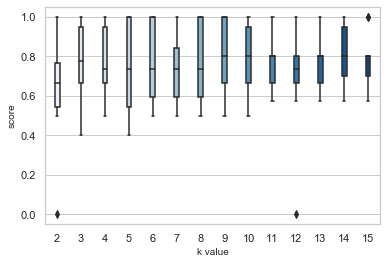

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_value = []
score = []
for k in range(2,16):
    knn = KNeighborsClassifier(n_neighbors = k, metric="euclidean")
    scores = cross_val_score(knn,X = attrs_train,y = target_train, cv=10, scoring='f1')
    k_value.append(k)
    score.append(scores)   

sns.set(style="whitegrid")
sns.boxplot(y=score, x=k_value, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("k value", fontsize=10)
plt.show()

Cross-validatoin shows that Knn with k value 14 works best, since it would have better generalization compared to Knn with k value of 5.

[[13  1]
 [ 1 12]]
Accuracy: 0.9259259259259259
Precision:  0.9230769230769231
Recall:  0.9230769230769231
ROC AUC score:  0.9505494505494506


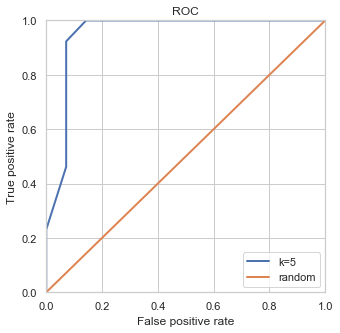

In [6]:
knn = KNeighborsClassifier(n_neighbors = 14, metric="euclidean")
knn.fit(attrs_train,target_train)
knn_prob = knn.predict_proba(attrs_test)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(target_test, knn_prob[:,1], pos_label=1, sample_weight=None)
target_pred = knn.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
print("ROC AUC score: ", metrics.roc_auc_score(target_test,knn_prob[:,1], average='macro', sample_weight=None))

plt.figure(figsize=(5,5))
plt.plot(fpr_knn,tpr_knn,linewidth=2.0, label = "k=5")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Decision Tree Classifier

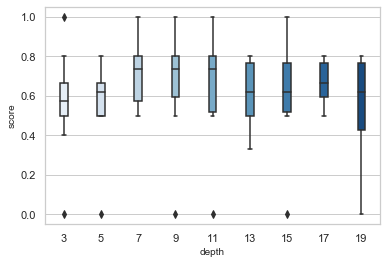

In [7]:
from sklearn.tree import DecisionTreeClassifier

depth = []
score = []
for i in range(3,20,2):
    clf = DecisionTreeClassifier(max_depth = i)
    scores = cross_val_score(clf,X = attrs_train,y = target_train, cv=10, scoring='f1')
    depth.append(i)
    score.append(scores)
    
sns.set(style="whitegrid")
sns.boxplot(y=score, x=depth, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("depth", fontsize=10)
plt.show()

Cross-validatoin shows that decision tree with depth 7 works best.

[[10  4]
 [ 3 10]]
Accuracy: 0.7407407407407407
Precision:  0.7142857142857143
Recall:  0.7692307692307693
ROC AUC score:  0.7417582417582418


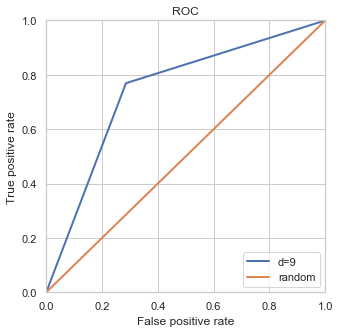

In [8]:
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(attrs_train,target_train)
tree_prob = tree.predict_proba(attrs_test)
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(target_test, tree_prob[:,1], pos_label=1, sample_weight=None)
target_pred = tree.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
print("ROC AUC score: ", metrics.roc_auc_score(target_test,tree_prob[:,1], average='macro', sample_weight=None))

plt.figure(figsize=(5,5))
plt.plot(fpr_tree,tpr_tree,linewidth=2.0, label = "d=9")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Gaussian Naive Bayes Classifier

[[13  1]
 [ 2 11]]
Accuracy: 0.8888888888888888
Precision:  0.9166666666666666
Recall:  0.8461538461538461
ROC AUC score:  0.9478021978021979


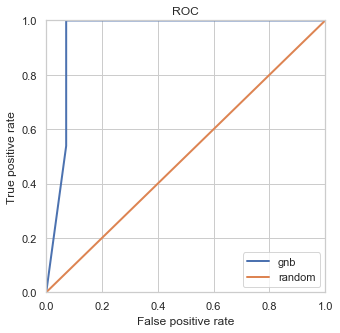

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
target_pred = gnb.fit(attrs_train, target_train).predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))


gnb_prob = gnb.predict_proba(attrs_test)
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(target_test, gnb_prob[:,1], pos_label=1, sample_weight=None)
print("ROC AUC score: ", metrics.roc_auc_score(target_test,gnb_prob[:,1], average='macro', sample_weight=None))
plt.figure(figsize=(5,5))
plt.plot(fpr_gnb,tpr_gnb,linewidth=2.0, label = "gnb")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Logistic Regression

[[13  1]
 [ 2 11]]
Accuracy: 0.8888888888888888
Precision:  0.9166666666666666
Recall:  0.8461538461538461
ROC AUC score:  0.9230769230769231


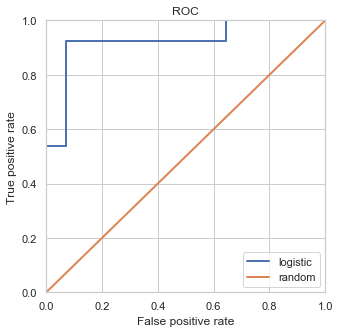

In [10]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(random_state=0).fit(attrs_train, target_train)
target_pred = logi.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))


logi_prob = logi.predict_proba(attrs_test)
fpr_logi, tpr_logi, thresholds_logi = metrics.roc_curve(target_test, logi_prob[:,1], pos_label=1, sample_weight=None)
print("ROC AUC score: ", metrics.roc_auc_score(target_test,logi_prob[:,1], average='macro', sample_weight=None))
plt.figure(figsize=(5,5))
plt.plot(fpr_logi,tpr_logi,linewidth=2.0, label = "logistic")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Random Forest using Bagging

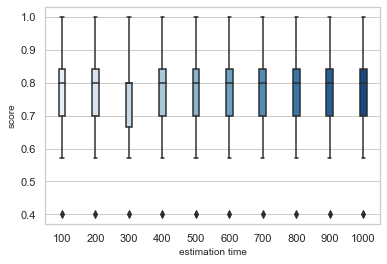

In [11]:
from sklearn import ensemble

depth = []
score = []
for i in range(100,1100,100):
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=9,min_samples_leaf=5), 
    n_estimators=i)
    scores = cross_val_score(bagging_dt,X = attrs_train,y = target_train, cv=10, scoring='f1')
    depth.append(i)
    score.append(scores)
    
sns.set(style="whitegrid")
sns.boxplot(y=score, x=depth, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("estimation time", fontsize=10)
plt.show()

Cross-validatoin shows that bagging with 400 decision tree in forest works best.

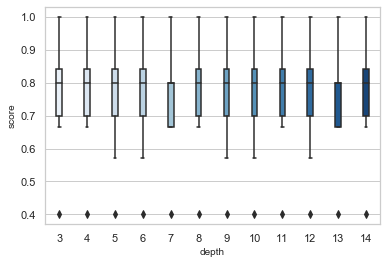

In [12]:
depth = []
score = []
for i in range(3,15,1):
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=i,min_samples_leaf=5), 
    n_estimators=400)
    scores = cross_val_score(bagging_dt,X = attrs_train,y = target_train, cv=10, scoring='f1')
    depth.append(i)
    score.append(scores)
    
sns.set(style="whitegrid")
sns.boxplot(y=score, x=depth, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("depth", fontsize=10)
plt.show()

Cross-validatoin shows that bagging using decision tree with depth 11 works best.

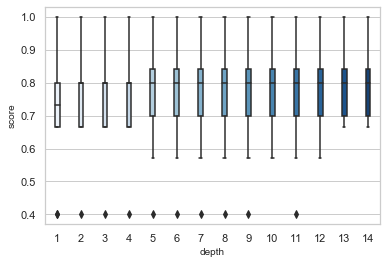

In [13]:
depth = []
score = []
for i in range(1,15,1):
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=12,min_samples_leaf=i), 
    n_estimators=400)
    scores = cross_val_score(bagging_dt,X = attrs_train,y = target_train, cv=10, scoring='f1')
    depth.append(i)
    score.append(scores)
    
sns.set(style="whitegrid")
sns.boxplot(y=score, x=depth, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("depth", fontsize=10)
plt.show()

Cross-validatoin shows that bagging using decision tree with at least 10 sample in each leave works best.

[[13  1]
 [ 1 12]]
Accuracy: 0.9259259259259259
Precision:  0.9230769230769231
Recall:  0.9230769230769231
ROC AUC score:  0.9725274725274725


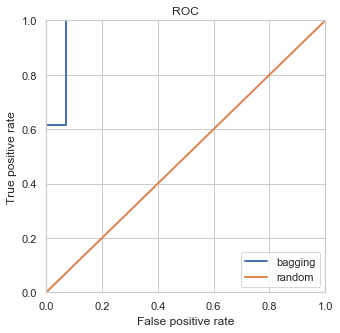

In [14]:
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=DecisionTreeClassifier(random_state=0,max_depth=12,min_samples_leaf=10), 
    n_estimators=400)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_forest, tpr_forest, thresholds_forest = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_forest,tpr_forest,linewidth=2.0, label = "bagging")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Bagging Knn

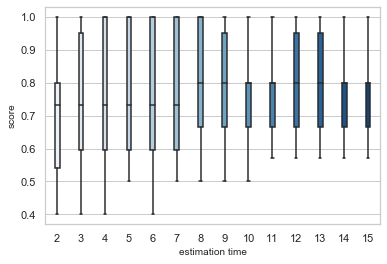

In [15]:
depth = []
score = []
for i in range(2,16):
    bagging_dt=ensemble.BaggingClassifier (
    base_estimator=KNeighborsClassifier(n_neighbors = i, metric="euclidean"), 
    n_estimators=400)
    scores = cross_val_score(bagging_dt,X = attrs_train,y = target_train, cv=10, scoring='f1')
    depth.append(i)
    score.append(scores)
    
sns.set(style="whitegrid")
sns.boxplot(y=score, x=depth, palette="Blues",width=0.2)
plt.ylabel("score", fontsize=10)
plt.xlabel("estimation time", fontsize=10)
plt.show()

[[13  1]
 [ 1 12]]
Accuracy: 0.9259259259259259
Precision:  0.9230769230769231
Recall:  0.9230769230769231
ROC AUC score:  0.9560439560439561


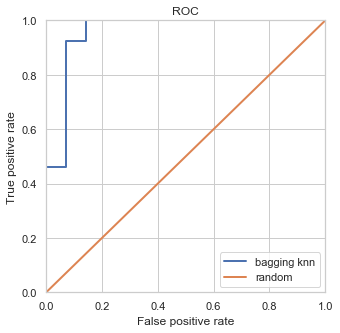

In [16]:
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=KNeighborsClassifier(n_neighbors = 12, metric="euclidean"), 
    n_estimators=300)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_bag_knn, tpr_bag_knn, thresholds_bag_knn = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_bag_knn,tpr_bag_knn,linewidth=2.0, label = "bagging knn")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Bagging Logistic Regression

[[13  1]
 [ 2 11]]
Accuracy: 0.8888888888888888
Precision:  0.9166666666666666
Recall:  0.8461538461538461
ROC AUC score:  0.9175824175824177


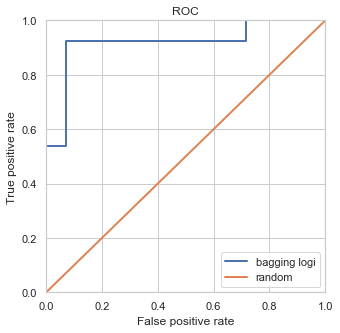

In [17]:
bagging_dt=ensemble.BaggingClassifier (
    base_estimator=LogisticRegression(random_state=0), 
    n_estimators=300)
bagging_dt.fit(attrs_train,target_train)
target_pred = bagging_dt.predict(attrs_test)
cm = metrics.confusion_matrix(target_test,target_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(target_test,target_pred))
print("Precision: ", metrics.precision_score(target_test,target_pred))
print("Recall: ", metrics.recall_score(target_test,target_pred))
bagging_dt_prob = bagging_dt.predict_proba(attrs_test)
print("ROC AUC score: ",metrics.roc_auc_score(target_test,bagging_dt_prob[:,1], average='macro', sample_weight=None))

fpr_bag_logi, tpr_bag_logi, thresholds_bag_logi = metrics.roc_curve(target_test, bagging_dt_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5,5))
plt.plot(fpr_bag_logi,tpr_bag_logi,linewidth=2.0, label = "bagging logi")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

# Score of All Classifiers

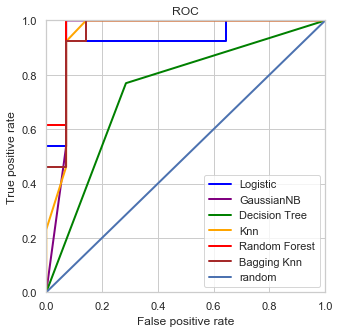

In [19]:
plt.figure(figsize=(5,5))
plt.plot(fpr_logi,tpr_logi,linewidth=2.0, label = "Logistic",color = "blue")
plt.plot(fpr_gnb,tpr_gnb,linewidth=2.0, label = "GaussianNB", color = "purple")
plt.plot(fpr_tree,tpr_tree,linewidth=2.0, label = "Decision Tree", color = "green")
plt.plot(fpr_knn,tpr_knn,linewidth=2.0, label = "Knn", color ="orange")
plt.plot(fpr_forest,tpr_forest,linewidth=2.0, label = "Random Forest", color = "red")
plt.plot(fpr_bag_knn, tpr_bag_knn,linewidth=2.0, label = "Bagging Knn", color = "brown")
plt.plot([0,0.2,0.4,0.6,0.8,1.0],[0,0.2,0.4,0.6,0.8,1.0],linewidth=2.0, label = "random")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('ROC')
plt.legend(loc="lower right")

Overall, bagging classifier using decision tree is the best. (roc score:0.97   accuracy:0.96)

Knn and Naive Bayes are the second best classifiers. (roc score:0.95   accuracy:0.92)

Bagging Knn doesn't improve much. (roc score:0.96   accuracy:0.92)

Logistic regression is not good enough. (roc score:0.94   accuracy:0.85)

Bagging Logistic regression doesn't improve as well. (roc score:0.93   accuracy:0.85)

Single decision tree is the worst. (roc score:0.74   accuracy:0.74)

In [20]:
metrics.roc_auc_score(target_test,0.9*knn_prob[:,1]+0.8*logi_prob[:,1], average='macro', sample_weight=None)

0.9615384615384616